# 機器學習建立模型四步驟

在 Scikit-learn 中，建立一個機器學習的模型其實非常簡單，流程大略是以下四個步驟

1. 讀進資料，並檢查 shape (有多少 rows, features，label 是甚麼型態)
    - 常用的讀取資料函數
        - pd.read_csv
        - np.loadtxt 
        - sklearn.datasets.load_xxx
    - data.shape (data need to be numpy arrays or pandas object)
2. 將資料切為訓練集 (train) / 測試集 (test)
    - x_train, x_test, y_train, y_test = train_test_split(data)
3. 建立模型，將資料 fit 進模型開始訓練
    - clf = DecisionTreeClassifier()
    - clf.fit(x_train, y_train)
4. 將測試資料 (features) 放進訓練好的模型中，得到 prediction，與測試資料的 label (y_test) 做評估
    - y_prediction = clf.predict(x_test)
    - accuracy_score(y_test, y_prediction)
    - f1_score(y_test, y_prediction)

In [34]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [35]:
# read iris data
iris = load_iris()

In [36]:
# check the data shape
print(iris.data.shape, iris.target.shape)

(150, 4) (150,)


In [37]:
random_seed = 5 # set seed for same train test data split results
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=random_seed
                                                   )

In [38]:
print("shape of X_train: ", x_train.shape)

shape of X_train:  (112, 4)


In [39]:
print("shape of X_test: ", x_test.shape)

shape of X_test:  (38, 4)


In [40]:
clf = DecisionTreeClassifier()

In [41]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
y_pred = clf.predict(x_test)

In [43]:
accuracy_score(y_test, y_pred)

0.94736842105263153

In [44]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [45]:
clf.feature_importances_

array([ 0.0481294 ,  0.        ,  0.00820725,  0.94366335])

### visualize our tree

In [46]:
# run this code can install graphviz
# conda install graphviz``

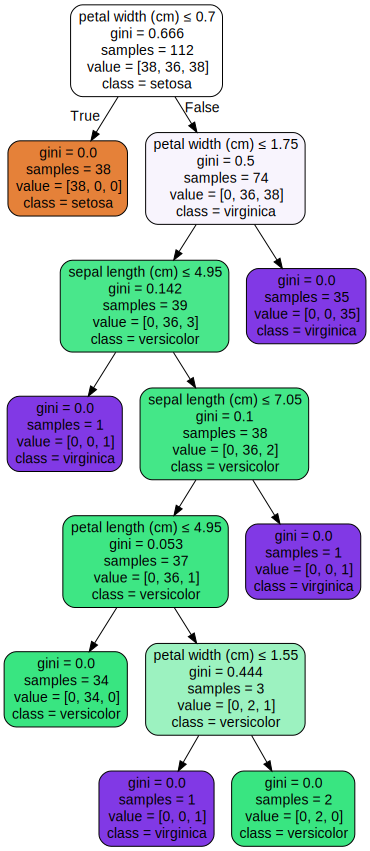

In [47]:
# 如環境未安裝 graphviz，無法執行此段 code
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data) 
graph

## 練習

請使用 Iris / Digits dataset，建立決策樹模型，試著更改 DecisionTree 中的 criterion, max_depth, min_samples_split 等參數，並評估不同的參數是否會影響
- training error / loss
- testing error / loss
- training time (可使用 %timeit 測試該行 code 的執行速度)

In [48]:
# example for how to use %%timeit
import numpy
%timeit numpy.random.normal(size=100)

5.92 µs ± 194 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
